In [1]:
var openDigger = require('../src/open_digger');
var year = 2021, startYear = 2017;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2017, 2018, 2019, 2020, 2021]
var chineseLabel = openDigger.label.getGitHubData([':regions/China']);
var americaLabel = openDigger.label.getGitHubData([':regions/America']);

Error: Cannot find module '../lib/metrics/index'
Require stack:
- /python_kernel/notebook/src/open_digger.js
- /python_kernel/notebook/notebook/[eval]

# 2022 中国开源发展蓝皮书

## 总体情况

## 全球

此处包含近五年全球 GitHub 日志事件总量、活跃仓库总量、活跃开发者总量的变化趋势。

In [2]:
openDigger.driver.clickhouse.query(`SELECT COUNT() AS event_count, COUNT(DISTINCT repo_id) AS active_repo_count, COUNT(DISTINCT actor_id) AS active_actor_count, toYear(created_at) AS year
FROM gh_events WHERE year >= ${startYear} AND year <= ${year} GROUP BY year ORDER BY year`, { format: 'JSONEachRow' }).then(data => {
    var eventCount = [], activeRepoCount = [], activeActorCount = [];
    data.forEach(d => {
        eventCount.push(d.event_count);
        activeRepoCount.push(d.active_repo_count);
        activeActorCount.push(d.active_actor_count);
    });
    openDigger.render.plotly([
        {x: years, y: eventCount, mode: 'scatter', name: '日志事件数量'},
        {x: years, y: activeRepoCount, mode: 'scatter', name: '活跃仓库数量', yaxis: 'y2'},
        {x: years, y: activeActorCount, mode: 'scatter', name: '活跃开发者数量', yaxis: 'y3'},
    ], {
        title: '全球 GitHub 事件日志、活跃仓库、活跃开发者五年趋势图',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        yaxis3: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
});

TypeError: Cannot read properties of undefined (reading 'driver')

### 中国

此节包含近五年中国项目在 GitHub 日志的事件总量、活跃仓库数量、活跃在中国项目上的开发者总量的变化趋势。

通过统计全域 GitHub 事件日志，可以看到近 5 年全球开源的总体活跃情况和活跃仓库数量都在明显上升，特别是疫情后，有一个加速上升的趋势。同时活跃仓库数量，目前保持着大约 24% 左右的增速，显示了全球开源发展中的增速。

中国同样，在经历了疫情前后的快速增长后，开始处于一个平稳的增长期。不过随着 2021 年国家各项政策性意见的出台、中国自己的基金会成立、大企业对开源的大力投入、以开源为主的初创企业的大量涌现等，相信接下来中国又会进入到一个快速的增长期。

In [3]:
openDigger.driver.clickhouse.query(`SELECT COUNT() AS event_count, COUNT(DISTINCT repo_id) AS active_repo_count, COUNT(DISTINCT actor_id) AS active_actor_count, toYear(created_at) AS year
FROM gh_events WHERE year >= ${startYear} AND year <= ${year} AND (repo_id IN [${chineseLabel.githubRepos.join(',')}] OR org_id IN [${chineseLabel.githubOrgs.join(',')}]) GROUP BY year ORDER BY year`, { format: 'JSONEachRow' }).then(data => {
    var eventCount = [], activeRepoCount = [], activeActorCount = [];
    data.forEach(d => {
        eventCount.push(d.event_count);
        activeRepoCount.push(d.active_repo_count);
        activeActorCount.push(d.active_actor_count);
    });
    openDigger.render.plotly([
        {x: years, y: eventCount, mode: 'scatter', name: '日志事件数量'},
        {x: years, y: activeRepoCount, mode: 'scatter', name: '活跃仓库数量', yaxis: 'y2'},
        {x: years, y: activeActorCount, mode: 'scatter', name: '活跃开发者数量', yaxis: 'y3'},
    ], {
        title: '中国项目 GitHub 事件日志、活跃仓库、活跃开发者五年趋势图',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        yaxis3: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
});

TypeError: Cannot read properties of undefined (reading 'driver')

## 中美企业对比

### 美国企业活跃度 Top 10

为了更好的展现中国企业在全球范围下的开源贡献整体水平，本报告通过对比美国头部企业参与开源贡献的数据来进行分析，四张表分别为：美国活跃度排名前十的开源贡献企业、中国活跃度排名前十的开源贡献企业、美国开源影响力排名前十的企业、以及中国开源影响力排名前十的企业，可以看到：

- 美国的传统互联网大企业任然是活跃度与影响力排名靠前的主要来源。在项目平均活跃度下，Google 依然是世界上平均活跃度最高的企业；而微软由于已使用 GitHub 作为大部分团队的日常开发平台，故项目数量较大，总活跃度第一；著名的开源独角兽公司 HashiCorp 也榜上有名。
- 中国的情况则是阿里巴巴的项目数量和总活跃度均为国内企业第一，但整体项目体量以及活跃度总量距离美国 Google 等大企业还有一定的差距；而中国的开源初创企业和项目则表现抢眼，按照项目平均活跃度，可以看到如 PingCAP（tidb，tikv）、Baidu（PaddlePaddle）、QingCloud（KubeSphere）、Vesoft（Nebula Graph）都脱颖而出。
- 从活跃度指标总的来看，虽然体量上中国和美国有一定的差距，但在项目平均活跃度上则水平相当，因此中国需要继续大力培育孵化好的开源项目。
- 影响力指标更关注开发者生态，在影响力指标下，大体趋势和活跃度指标下的一样，体量上中美存在一定差距，在项目平均影响力上则相当，其中中国企业中有赞脱颖而出，其主要的开源项目 vant 有着相当不错的开发者生态。

进一步，本报告也详细分析了中国企业近 5 年的开源发展趋势，包括活跃度趋势与影响力趋势。可以看到阿里巴巴、百度、蚂蚁三家企业长期名列前茅；阿里长期排名榜首，而百度近几年也明显加大了对开源贡献的投入，初创企业 PingCAP 也是一直稳居第四的位置。

In [4]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':regions/America'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC',
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '年度活跃度': d.activity[0],
        };
    }));
})

TypeError: Cannot read properties of undefined (reading 'index')

### 中国企业活跃度 Top 10

按照项目平均活跃度，可以看到如 PingCAP（tidb，tikv）、Baidu（PaddlePaddle）、QingCloud（KubeSphere）、Vesoft（Nebula Graph）都脱颖而出，而阿里巴巴的项目数量和总活跃度均为国内企业第一。

In [5]:
openDigger.index.activity.getRepoActivity({
    labelIntersect: [':regions/China', 'Company'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC'
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '年度活跃度': d.activity[0],
        };
    }));
})

TypeError: Cannot read properties of undefined (reading 'index')

### 美国企业影响力 Top 10

In [7]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':regions/America'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC',
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '影响力': d.openrank[0],
        };
    }));
})

┌─────────┬──────┬──────────────┬───────────┐
│ (index) │ 排名 │     公司     │  影响力   │
├─────────┼──────┼──────────────┼───────────┤
│    0    │  1   │ 'Microsoft'  │ 237923.63 │
│    1    │  2   │   'Google'   │ 161143.8  │
│    2    │  3   │   'Amazon'   │ 74846.98  │
│    3    │  4   │    'Meta'    │ 54182.47  │
│    4    │  5   │ 'HarshiCorp' │ 30236.69  │
│    5    │  6   │   'VMWare'   │ 24872.44  │
│    6    │  7   │    'IBM'     │ 21868.56  │
│    7    │  8   │  'Mozilla'   │ 20194.93  │
│    8    │  9   │   'Adobe'    │ 17324.69  │
│    9    │  10  │   'Oracle'   │ 10712.64  │
└─────────┴──────┴──────────────┴───────────┘


### 中国企业影响力 Top 10

影响力指标更关注开发者生态，在影响力指标下，中国企业中有赞脱颖而出，其主要的开源项目 vant 有着相当不错的开发者生态。

In [12]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: [':regions/China', 'Company'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC',
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '影响力': d.openrank[0],
        };
    }));
})

┌─────────┬──────┬─────────────┬──────────┐
│ (index) │ 排名 │    公司     │  影响力  │
├─────────┼──────┼─────────────┼──────────┤
│    0    │  1   │  'Alibaba'  │ 26997.84 │
│    1    │  2   │ 'Ant group' │ 22115.01 │
│    2    │  3   │   'Baidu'   │ 20941.26 │
│    3    │  4   │  'PingCAP'  │ 9348.61  │
│    4    │  5   │  'Tencent'  │ 9093.38  │
│    5    │  6   │ 'Fit2Cloud' │ 3981.58  │
│    6    │  7   │  'Huawei'   │ 3203.17  │
│    7    │  8   │ 'QingCloud' │ 2778.12  │
│    8    │  9   │    'JD'     │ 2569.72  │
│    9    │  10  │  'Youzan'   │  2442.9  │
└─────────┴──────┴─────────────┴──────────┘


### 近五年中国企业活跃度 Top 10

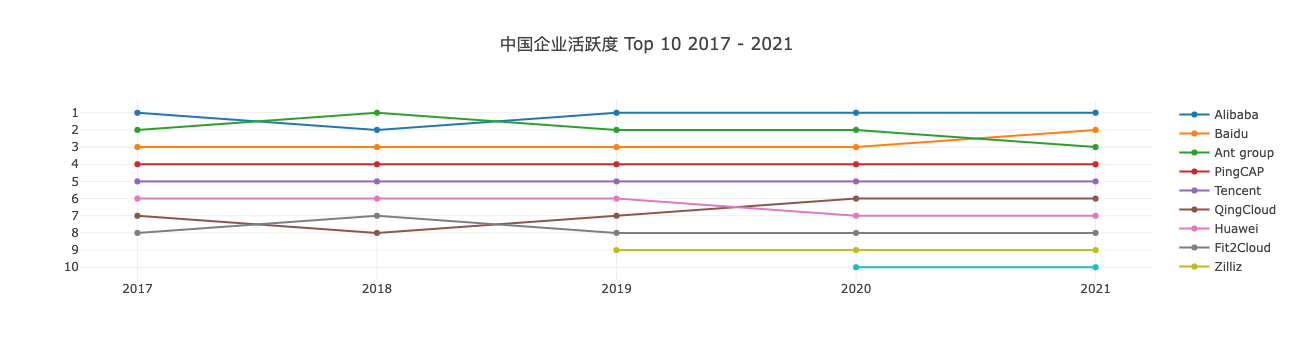

In [14]:
openDigger.index.activity.getRepoActivity({
    labelIntersect: [':regions/China', 'Company'],
    startYear, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year', order: 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.activity).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }) , {title: `中国企业活跃度 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 } })
})

### 近五年中国企业影响力 Top 10

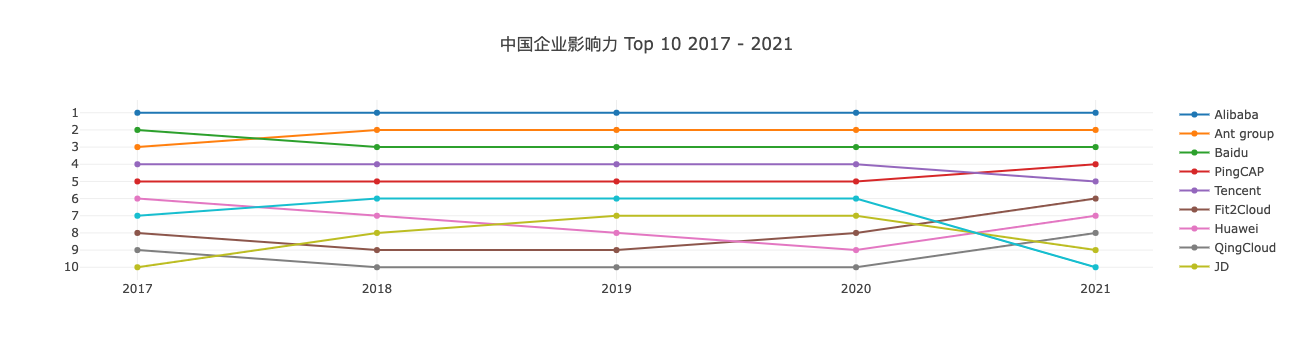

In [16]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: [':regions/China', 'Company'],
    startYear, endYear: year,
    endMonth: 12, groupBy: 'Company',
    groupTimeRange: 'year', order : 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.openrank).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }),{title: `中国企业影响力 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 } })
})

## 中国项目情况

在开源项目洞察这块，同样根据活跃度和影响力，分别比较了全球和中国排名前 20 的开源项目，可以看到：

- 在单个项目上，中国主导的开源项目的活跃度和影响力距离全球顶级开源项目的活跃度与影响力还有一定的差距，特别是在影响力方面，是一个需要长期建设的生态指标，需要我们最大限度的融入到全球开源生态里面发展我国的开源项目。
- 中国主导的开源项目中，来自百度的 PaddlePaddle 相关的两个项目保持上升 活跃度与影响力均位列第一，pingCAP 旗下的两个开源项目（TiDB、TiKV）则表现不俗。
- 在近 5 年的变化趋势上，活跃度方面，PaddlePaddle 相关的两个项目保持上升；影响力方面，阿里巴巴的 Nacos 和 PingCap 的 TiDB 则稳步上升。 

### GitHub 全球项目活跃度 Top 20

In [17]:
openDigger.index.activity.getRepoActivity({
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        activity: d.activity[0],
        issue_comment: d.issue_comment[0],
        open_issue: d.open_issue[0],
        open_pull: d.open_pull[0],
        review_comment: d.review_comment[0],
        merged_pull: d.merged_pull[0],
    };
})));

┌─────────┬──────────────────────────────────────────┬──────────┬───────────────┬────────────┬───────────┬────────────────┬─────────────┐
│ (index) │                   name                   │ activity │ issue_comment │ open_issue │ open_pull │ review_comment │ merged_pull │
├─────────┼──────────────────────────────────────────┼──────────┼───────────────┼────────────┼───────────┼────────────────┼─────────────┤
│    0    │             'NixOS/nixpkgs'              │ 47446.63 │    '99757'    │   '4182'   │  '36695'  │    '43766'     │   '32582'   │
│    1    │            'flutter/flutter'             │ 44646.53 │   '134227'    │  '14265'   │  '6787'   │    '10768'     │   '4667'    │
│    2    │            'microsoft/vscode'            │ 42989.58 │    '87009'    │  '21869'   │  '2337'   │     '3137'     │   '1728'    │
│    3    │          'home-assistant/core'           │ 40646.64 │    '78457'    │   '6758'   │  '9825'   │    '33373'     │   '8494'    │
│    4    │        'MicrosoftDocs/

### GitHub 中国项目活跃度 Top 20

In [20]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':regions/China'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        activity: d.activity[0],
        issue_comment: d.issue_comment[0],
        open_issue: d.open_issue[0],
        open_pull: d.open_pull[0],
        review_comment: d.review_comment[0],
        merged_pull: d.merged_pull[0],
    };
})));

┌─────────┬────────────────────────────────┬──────────┬───────────────┬────────────┬───────────┬────────────────┬─────────────┐
│ (index) │              name              │ activity │ issue_comment │ open_issue │ open_pull │ review_comment │ merged_pull │
├─────────┼────────────────────────────────┼──────────┼───────────────┼────────────┼───────────┼────────────────┼─────────────┤
│    0    │     'PaddlePaddle/Paddle'      │ 13291.71 │    '19651'    │   '1871'   │  '5955'   │    '10121'     │   '4062'    │
│    1    │         'pingcap/tidb'         │ 11451.6  │    '63588'    │   '3425'   │  '4879'   │    '11543'     │   '3833'    │
│    2    │    'ant-design/ant-design'     │ 8769.58  │    '13693'    │   '2682'   │  '1321'   │     '1072'     │    '959'    │
│    3    │         'apache/flink'         │ 8519.73  │    '14557'    │    '0'     │  '3414'   │    '14580'     │   '1589'    │
│    4    │        'apache/pulsar'         │ 6824.27  │    '13483'    │   '1361'   │  '2761'   │     '69

### GitHub 全球项目影响力 Top 20

In [21]:
openDigger.index.openrank.getRepoOpenrank({
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        open_rank: d.openrank[0],
    };
})));

┌─────────┬───────────────────────────────────┬───────────┐
│ (index) │               name                │ open_rank │
├─────────┼───────────────────────────────────┼───────────┤
│    0    │         'flutter/flutter'         │  24308.7  │
│    1    │       'home-assistant/core'       │ 20570.64  │
│    2    │          'NixOS/nixpkgs'          │ 20413.31  │
│    3    │        'microsoft/vscode'         │ 18565.14  │
│    4    │         'pytorch/pytorch'         │ 16227.35  │
│    5    │    'MicrosoftDocs/azure-docs'     │ 15987.61  │
│    6    │         'dotnet/runtime'          │ 15063.68  │
│    7    │      'kubernetes/kubernetes'      │ 13484.14  │
│    8    │            'odoo/odoo'            │ 11960.45  │
│    9    │         'elastic/kibana'          │ 11731.84  │
│   10    │         'rust-lang/rust'          │ 10332.07  │
│   11    │      'tensorflow/tensorflow'      │  9423.25  │
│   12    │         'grafana/grafana'         │  9388.1   │
│   13    │        'godotengine/godot'  

### GitHub 中国项目影响力 Top 20

In [22]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':regions/China'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        open_rank: d.openrank[0],
    };
})));

┌─────────┬────────────────────────────────┬───────────┐
│ (index) │              name              │ open_rank │
├─────────┼────────────────────────────────┼───────────┤
│    0    │    'ant-design/ant-design'     │  4451.46  │
│    1    │     'PaddlePaddle/Paddle'      │  4394.88  │
│    2    │         'pingcap/tidb'         │  2828.71  │
│    3    │         'apache/flink'         │  2549.15  │
│    4    │    'apache/shardingsphere'     │  2328.87  │
│    5    │        'apache/pulsar'         │  2246.38  │
│    6    │        'alibaba/nacos'         │  2232.96  │
│    7    │          'apache/tvm'          │  2088.6   │
│    8    │    'PaddlePaddle/PaddleOCR'    │  2080.04  │
│    9    │    'open-mmlab/mmdetection'    │  2057.54  │
│   10    │  'ant-design/pro-components'   │  2017.43  │
│   11    │        'apache/echarts'        │  1904.61  │
│   12    │         'NervJS/taro'          │  1866.69  │
│   13    │      'taosdata/TDengine'       │  1578.5   │
│   14    │         'youzan/van

### 近五年中国活跃度 Top 10 项目变化趋势图

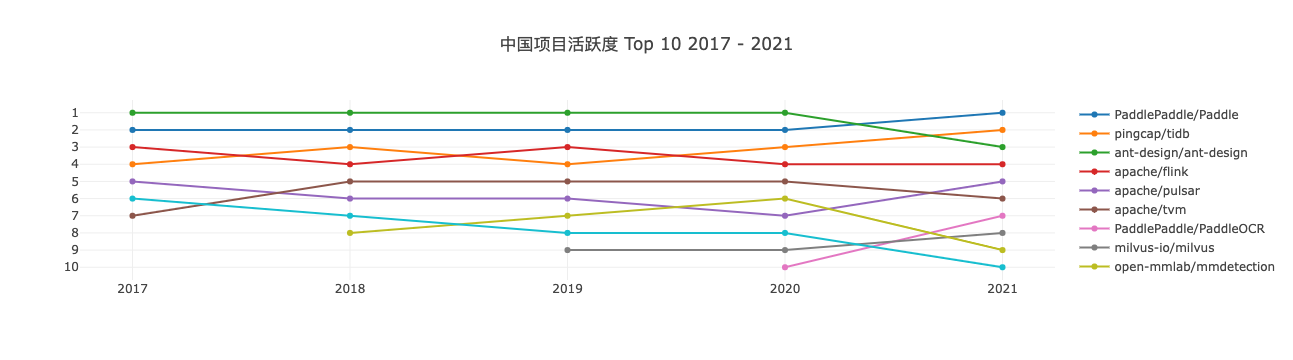

In [23]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':regions/China'],
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.activity).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }) , {title: `中国项目活跃度 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 }  })
});

### 近五年中国影响力 Top 10 项目变化趋势图

PaddleOCR 在 2020 年开源以来，活跃度和影响力都飞速进步，很快就进入了顶级项目行列。

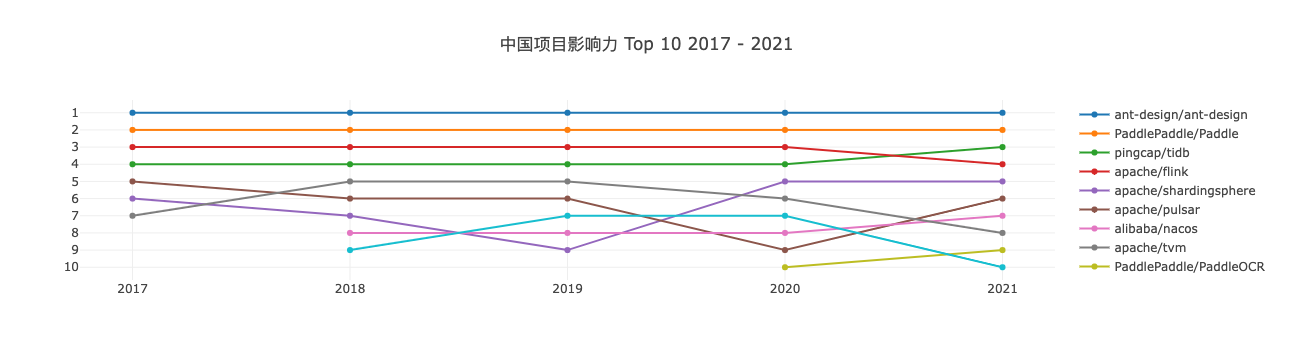

In [24]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':regions/China'],
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.openrank).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }) , {title: `中国项目影响力 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 }  })
});